<h1>IMPORTING NETFLIX STOCK DATA FROM YAHOO FINANCE WEBSITE USING SELENIUM AND BEAUTIFUL SOUP AND PLOTTING IT</h1>
<h3>Line Chart</h3>
<h3>Bar Chart</h3>
<h3>Candlestick Chart</h3>

In [1]:
import pandas as pd
import requests
import plotly.graph_objects as go
from datetime import datetime
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_binary
import string
import matplotlib.pyplot as plt

In [2]:
#Defining URL from where the stock data will be pulled
url = "https://finance.yahoo.com/quote/NFLX/history?period1=1439078400&period2=1623196800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true"

#Initilizing Selenium driver which will be using Chrome to fetch the HTML page from the URL above
driver = webdriver.Chrome()
driver.get(url)
html = driver.execute_script('return document.body.innerHTML;')

#HTML is converted into BeautifulSoup object
soup = BeautifulSoup(html,'html5lib')

In [3]:
#creating empty dataframe
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

In [4]:
#checking content of soup object
soup

px\) {
  margin-left: 40px;
}
#a2csn .Mstart\(80px\) {
  margin-left: 80px;
}
#a2csn .Mstart\(990px\) {
  margin-left: 990px;
}
#a2csn .Maw\(1340px\) {
  max-width: 1340px;
}
#a2csn .Mih\(100\%\) {
  min-height: 100%;
}
#a2csn .Mih\(200px\) {
  min-height: 200px;
}
#a2csn .Mih\(254px\) {
  min-height: 254px;
}
#a2csn .Mih\(750px\) {
  min-height: 750px;
}
#a2csn .Mih\(94px\) {
  min-height: 94px;
}
#a2csn .Miw\(980px\) {
  min-width: 980px;
}
#a2csn .O\(n\) {
  outline: none;
}
#a2csn .T\(0\) {
  top: 0;
}
#a2csn .T\(25px\) {
  top: 25px;
}
#a2csn .T\(305px\) {
  top: 305px;
}
#a2csn .T\(335px\) {
  top: 335px;
}
#a2csn .T\(65px\) {
  top: 65px;
}
#a2csn .T\(90px\) {
  top: 90px;
}
#a2csn .End\(0\%\) {
  right: 0%;
}
#a2csn .End\(0\) {
  right: 0;
}
#a2csn .End\(20px\) {
  right: 20px;
}
#a2csn .End\(a\) {
  right: auto;
}
#a2csn .B\(0\) {
  bottom: 0;
}
#a2csn .Start\(0\) {
  left: 0;
}
#a2csn .Start\(20\%\) {
  left: 20%;
}
.modal-open .modal-open_Op\(1\) {
  opacity: 1 !important;
}

In [5]:
#Recording data from table on HTML page using BeautifulSoup into DataFrame netflix_data
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

In [6]:
#checking dataframe netflix_data
netflix_data

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85
...,...,...,...,...,...,...,...
65,"Jan 01, 2016",109.00,122.18,90.11,91.84,"488,193,200",91.84
66,"Dec 01, 2015",124.47,133.27,113.85,114.38,"319,939,200",114.38
67,"Nov 01, 2015",109.20,126.60,101.86,123.33,"320,321,800",123.33
68,"Oct 01, 2015",102.91,115.83,96.26,108.38,"446,204,400",108.38


In [7]:
#copying dataframe netflix_data into new dataframe 'df' for further operations
df=netflix_data.copy()

In [8]:
#Since data fetched from HTML is int String, converting data into float type
df['Open']=pd.to_numeric(df["Open"], downcast="float")
df['High']=pd.to_numeric(df["High"], downcast="float")
df['Low']=pd.to_numeric(df["Low"], downcast="float")
df['Close']=pd.to_numeric(df["Close"], downcast="float")

#Volumne column contains number seperated by comma(,) so processing to convert into float
df['Volume']=df['Volume'].apply(lambda row:float("".join(row.split(','))))

#Converting string type of 'Date' column into Datetime type
df['Date']=pd.to_datetime(df['Date'])

#Droping AdjClose column since we will not be plotting this
df1=df.drop('Adj Close',axis=1)

In [9]:
df1

,Date,Open,High,Low,Close,Volume
0,2021-06-01,504.010010,536.130005,482.140015,528.210022,78560600.0
1,2021-05-01,512.650024,518.950012,478.540009,502.809998,66927600.0
2,2021-04-01,529.929993,563.559998,499.000000,513.469971,111573300.0
3,2021-03-01,545.570007,556.989990,492.850006,521.659973,90183900.0
4,2021-02-01,536.789978,566.650024,518.280029,538.849976,61902300.0
...,...,...,...,...,...,...
65,2016-01-01,109.000000,122.180000,90.110001,91.839996,488193200.0
66,2015-12-01,124.470001,133.270004,113.849998,114.379997,319939200.0
67,2015-11-01,109.199997,126.599998,101.860001,123.330002,320321800.0
68,2015-10-01,102.910004,115.830002,96.260002,108.379997,446204400.0


<AxesSubplot:xlabel='Date'>

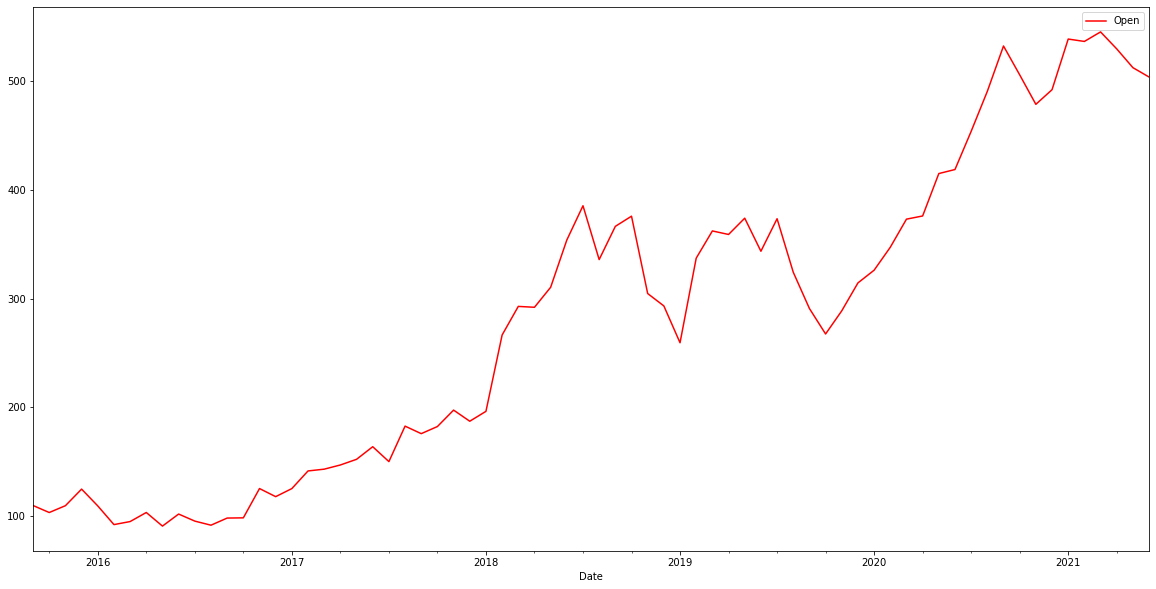

In [10]:
#Plotting Open stock price vs. Date
df1.plot(figsize=(20,10),x='Date',y='Open',color='red')

In [11]:
#creating subset of dataframe for the year 2021. 
df2021=df1.loc[(df['Date']>='2021-01-01')&(df['Date']<='2021-06-01')]
df2021

,Date,Open,High,Low,Close,Volume
0,2021-06-01,504.010010,536.130005,482.140015,528.210022,78560600.0
1,2021-05-01,512.650024,518.950012,478.540009,502.809998,66927600.0
2,2021-04-01,529.929993,563.559998,499.000000,513.469971,111573300.0
3,2021-03-01,545.570007,556.989990,492.850006,521.659973,90183900.0
4,2021-02-01,536.789978,566.650024,518.280029,538.849976,61902300.0
5,2021-01-01,539.000000,593.289978,485.670013,532.390015,139988600.0


<AxesSubplot:xlabel='Date'>

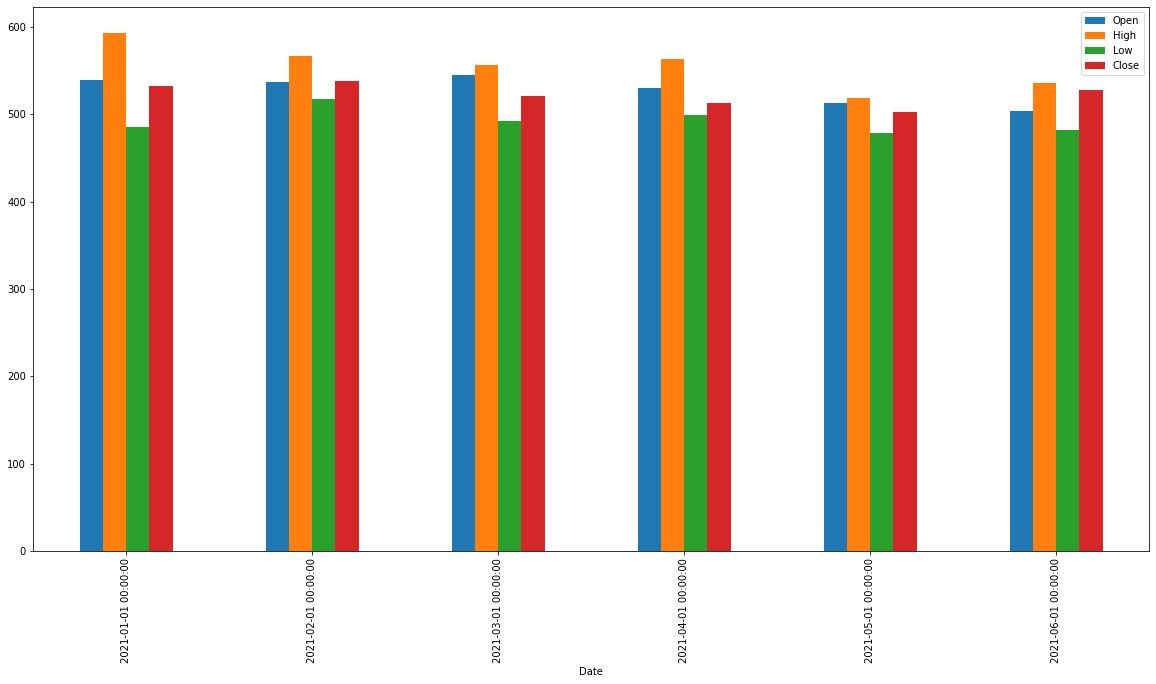

In [12]:
df2021=df2021.sort_values(by='Date',ignore_index=True)
df2021.plot.bar(figsize=(20,10),x='Date',y=['Open','High','Low','Close'])

In [14]:
#Creating Candlestick chart using Plotly
fig = go.Figure(data=[go.Candlestick(x=df1['Date'],
                open=df1['Open'],
                high=df1['High'],
                low=df1['Low'],
                close=df1['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False,yaxis_title='NETFLIX Stock',title='STOCK DATA FOR NETFLIX',width=1200, height=800)
fig.show()

<h1>THANK YOU</h1>